<a href="https://colab.research.google.com/github/vferman2000/Springboard/blob/master/Relax_Inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Relax Inc Challenge

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .


In [ ]:
#Importing libraries
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import random
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Downloading files 
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving takehome_users.csv to takehome_users.csv


In [ ]:
#takehome_users file
takehome_users = pd.read_csv('/content/takehome_users.csv', encoding='latin-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
#Download files
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [ ]:
#takehome_user_engagement file
df = pd.read_csv('/content/takehome_user_engagement.csv')
df.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
#conerting time_stamp to datetime
df['time_stamp'] =  pd.to_datetime(df['time_stamp'], format="%Y-%m-%d  %H:%M:%S")
print(len(df.user_id.unique()))
df.info()

8823
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period ,

In [ ]:
#timestamp converted to week sessions
df['wk'] = df['time_stamp'].dt.week
df = df.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="freq")#counts number of loggins in that particular week
df['3logins_wk'] = [1 if s >= 3 else 0 for s in df['freq']]#Assigns a 1 if user has logged in at least 3 times that week. 
print(len(df))
df.head()



57172


,wk,user_id,freq,3logins_wk
0,1,2,1,0
1,1,10,5,1
2,1,42,4,1
3,1,43,1,0
4,1,46,1,0


In [ ]:
df.describe()

,wk,user_id,freq,3logins_wk
count,57172.00000,57172.000000,57172.000000,57172.000000
mean,24.77858,5967.073987,3.636693,0.520727
std,15.22946,3459.346088,2.934514,0.499575
min,1.00000,1.000000,1.000000,0.000000
25%,12.00000,3038.750000,1.000000,0.000000
50%,22.00000,5853.000000,3.000000,1.000000
75%,39.00000,9031.000000,5.000000,1.000000
max,52.00000,12000.000000,14.000000,1.000000


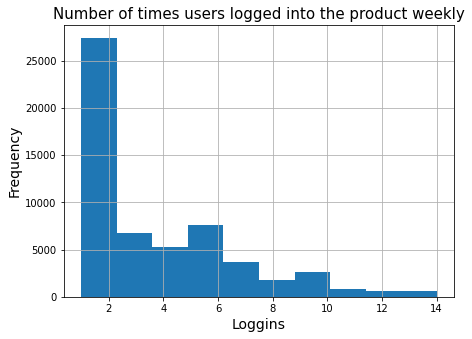

In [ ]:
#plot shows that a large number of users logged in between 0-2 times a week.
plt.figure(figsize=(7,5))
plt.hist(df['freq'])
plt.title('Number of times users logged into the product weekly' , fontsize=15)
plt.xlabel('Loggins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.grid()
plt.show()

In [ ]:
freq_avg=pd.DataFrame()
freq_avg['avg_wk'] = df.groupby('user_id')['freq'].mean()#makes a column for weekly average of logins 
freq_avg['freq_total'] = df.groupby('user_id')['freq'].sum()# makes a column for total number of logins
freq_avg['3_logins_sum'] = df.groupby('user_id')['3logins_wk'].sum()#makes a column for the total number of times user logged in at least 3 times in seven days.
freq_avg['adopter'] = [1 if s >= 1 else 0 for s in freq_avg['3_logins_sum']]#It makes a column for adopter. It assigns 1 if adopter(at least 1 week with 3 logins), a 0 if non-adapter.
freq_avg = freq_avg.reset_index()
freq_avg.describe()

,user_id,avg_wk,freq_total,3_logins_sum,adopter
count,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,6019.821716,1.418059,23.565341,3.374249,0.163776
std,3464.251001,1.237780,73.988152,10.670697,0.370094
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3017.500000,1.000000,1.000000,0.000000,0.000000
50%,6034.000000,1.000000,1.000000,0.000000,0.000000
75%,9029.500000,1.000000,3.000000,0.000000,0.000000
max,12000.000000,11.653846,606.000000,52.000000,1.000000


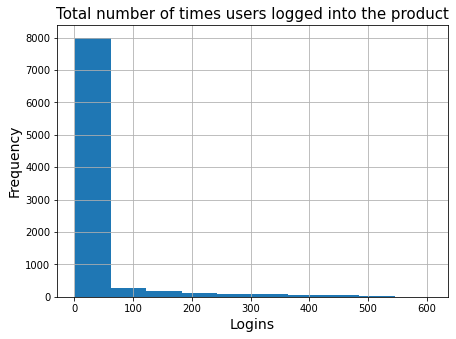

In [ ]:
# plot shows total number of logins
plt.figure(figsize=(7,5))
plt.hist(freq_avg['freq_total'])
plt.title('Total number of times users logged into the product' , fontsize=15)
plt.xlabel('Logins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.grid()
plt.show()

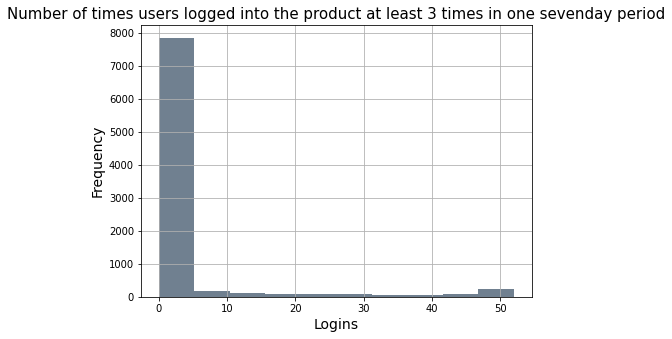

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(freq_avg['3_logins_sum'],color = 'slategrey')
plt.title('Number of times users logged into the product at least 3 times in one sevenday period' , fontsize=15)
plt.xlabel('Logins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.grid()
plt.show()

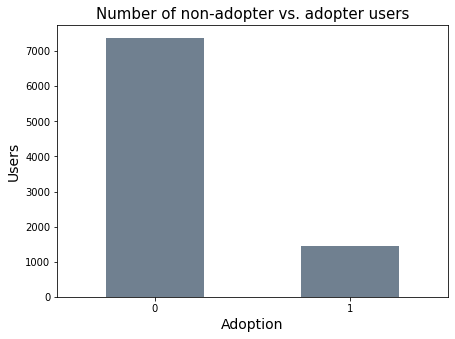

In [ ]:
plt.figure(figsize=(7,5))
adopters = freq_avg['adopter'].value_counts()
adopters.plot(kind = 'bar', rot=0, color = 'slategrey')
plt.title('Number of non-adopter vs. adopter users', fontsize=15)
plt.xlabel('Adoption', fontsize=14)
plt.ylabel('Users',fontsize=14)
plt.show()

In [ ]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [ ]:
#features DataFrame is created. Merged bewteen freq_avg and takehome_users DataFrame.
takehome_users['user_id']=takehome_users['object_id']
features = pd.merge(freq_avg,takehome_users.drop(['object_id'],axis=1),  on='user_id', how='inner')
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8823 non-null   int64  
 1   avg_wk                      8823 non-null   float64
 2   freq_total                  8823 non-null   int64  
 3   3_logins_sum                8823 non-null   int64  
 4   adopter                     8823 non-null   int64  
 5   creation_time               8823 non-null   object 
 6   name                        8823 non-null   object 
 7   email                       8823 non-null   object 
 8   creation_source             8823 non-null   object 
 9   last_session_creation_time  8823 non-null   float64
 10  opted_in_to_mailing_list    8823 non-null   int64  
 11  enabled_for_marketing_drip  8823 non-null   int64  
 12  org_id                      8823 non-null   int64  
 13  invited_by_user_id          4776 

In [ ]:
# Finding null values
features.invited_by_user_id[features.invited_by_user_id.isnull()]
#Filling missing phone values 
features.invited_by_user_id = features.invited_by_user_id.fillna(0)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8823 non-null   int64  
 1   avg_wk                      8823 non-null   float64
 2   freq_total                  8823 non-null   int64  
 3   3_logins_sum                8823 non-null   int64  
 4   adopter                     8823 non-null   int64  
 5   creation_time               8823 non-null   object 
 6   name                        8823 non-null   object 
 7   email                       8823 non-null   object 
 8   creation_source             8823 non-null   object 
 9   last_session_creation_time  8823 non-null   float64
 10  opted_in_to_mailing_list    8823 non-null   int64  
 11  enabled_for_marketing_drip  8823 non-null   int64  
 12  org_id                      8823 non-null   int64  
 13  invited_by_user_id          8823 

In [ ]:
#converting creation time to datetime
features['creation_time'] =  pd.to_datetime(features['creation_time'], format="%Y-%m-%d  %H:%M:%S")


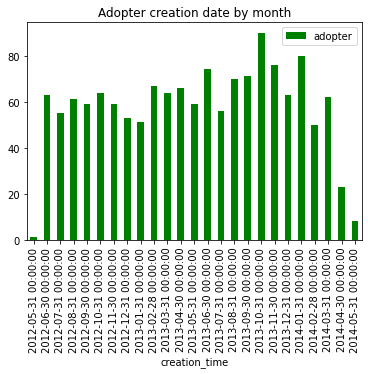

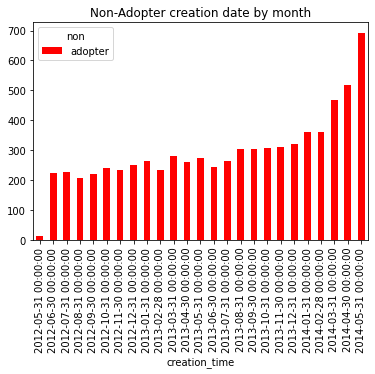

In [ ]:
#plotting adopters and non adopters creation time by month
adopter_creation_time = pd.DataFrame()
adopter_creation_time =  features[['creation_time', 'adopter']]
adopter_creation_time = adopter_creation_time.loc[(adopter_creation_time.adopter==1)]
adopter_creation_time = adopter_creation_time.set_index('creation_time')

non_adopter_creation_time = pd.DataFrame()
non_adopter_creation_time =  features[['creation_time', 'adopter']]
non_adopter_creation_time = non_adopter_creation_time.loc[(non_adopter_creation_time.adopter==0)]
non_adopter_creation_time = non_adopter_creation_time.set_index('creation_time')

ax = adopter_creation_time.groupby(pd.Grouper(freq='M')).count()
ax.plot(kind='bar', color='green')
plt.title("Adopter creation date by month")
plt.show()

ax = non_adopter_creation_time.groupby(pd.Grouper(freq='M')).count()
ax.plot(kind='bar', color='red')
plt.legend(title='non')
plt.title("Non-Adopter creation date by month")
plt.show()



In [ ]:

features['creation_time'] = features.creation_time.values.astype(np.int64) // 10 ** 9

In [ ]:
#Creating a hot encoding for creation_source
features_enc = pd.get_dummies(features, columns=["creation_source"])

In [ ]:
features = features_enc[['creation_time','last_session_creation_time','opted_in_to_mailing_list',	'enabled_for_marketing_drip',	'org_id',	'invited_by_user_id',	'creation_source_GUEST_INVITE',	'creation_source_ORG_INVITE',	'creation_source_PERSONAL_PROJECTS',	'creation_source_SIGNUP',	'creation_source_SIGNUP_GOOGLE_AUTH','adopter']]

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   creation_time                       8823 non-null   int64  
 1   last_session_creation_time          8823 non-null   float64
 2   opted_in_to_mailing_list            8823 non-null   int64  
 3   enabled_for_marketing_drip          8823 non-null   int64  
 4   org_id                              8823 non-null   int64  
 5   invited_by_user_id                  8823 non-null   float64
 6   creation_source_GUEST_INVITE        8823 non-null   uint8  
 7   creation_source_ORG_INVITE          8823 non-null   uint8  
 8   creation_source_PERSONAL_PROJECTS   8823 non-null   uint8  
 9   creation_source_SIGNUP              8823 non-null   uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  8823 non-null   uint8  
 11  adopter                             8823 no

In [ ]:
#feature importance with chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = features.iloc[:,0:10]  #independent columns
y = features.iloc[:,11]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                               Specs         Score
1         last_session_creation_time  3.966737e+08
0                      creation_time  3.341291e+07
5                 invited_by_user_id  9.859616e+03
4                             org_id  4.683464e+03
6       creation_source_GUEST_INVITE  1.998244e+01
9             creation_source_SIGNUP  4.943727e+00
8  creation_source_PERSONAL_PROJECTS  4.573190e+00
7         creation_source_ORG_INVITE  2.218053e+00
2           opted_in_to_mailing_list  5.919444e-01
3         enabled_for_marketing_drip  1.042550e-01


[0.33253984 0.54692086 0.00723357 0.00588492 0.060512   0.0349115
 0.00335887 0.00331028 0.00245232 0.00287583]


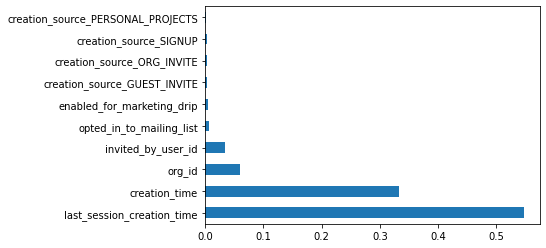

In [ ]:
#feature importance with trees classifier
X = features.iloc[:,0:10]  #independent columns
y = features.iloc[:,11]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#feature importance with random forest model
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(features[[

'creation_time',                                                                
'last_session_creation_time',	
'opted_in_to_mailing_list',	
'enabled_for_marketing_drip',	
'org_id',	
'invited_by_user_id',	
'creation_source_GUEST_INVITE',	
'creation_source_ORG_INVITE',	
'creation_source_PERSONAL_PROJECTS',	
'creation_source_SIGNUP',	
'creation_source_SIGNUP_GOOGLE_AUTH',

      ]], features.adopter.values, test_size=.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)

In [ ]:
classifier.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(Xtest)

Feature ranking:
1. feature 0 (0.681806)
2. feature 3 (0.175987)
3. feature 4 (0.104948)
4. feature 1 (0.010386)
5. feature 2 (0.009014)
6. feature 6 (0.004555)
7. feature 9 (0.003879)
8. feature 5 (0.003788)
9. feature 8 (0.002865)
10. feature 7 (0.002771)


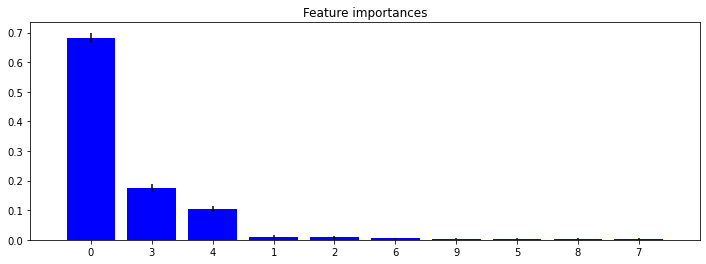

In [ ]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,4))
plt.title("Feature importances")
plt.bar(range(Xtrain.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(Xtrain.shape[1]), indices)
plt.xlim([-1, Xtrain.shape[1]])
plt.show()
